In [1]:
import os
import sys
import numpy
import json
import subprocess
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
folder = 'data'
filename = 'mutants_docked_geometry-interactions_post-processed.json'
path = os.path.join(folder, filename)

with open(path, 'r') as fp:
    S_mutants = json.load(fp)

In [3]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

# Distributions of mean peptide Euler angles (unclassified)

> _NOTE_ `seaborn` chooses algorithmically the band width for every histogram.

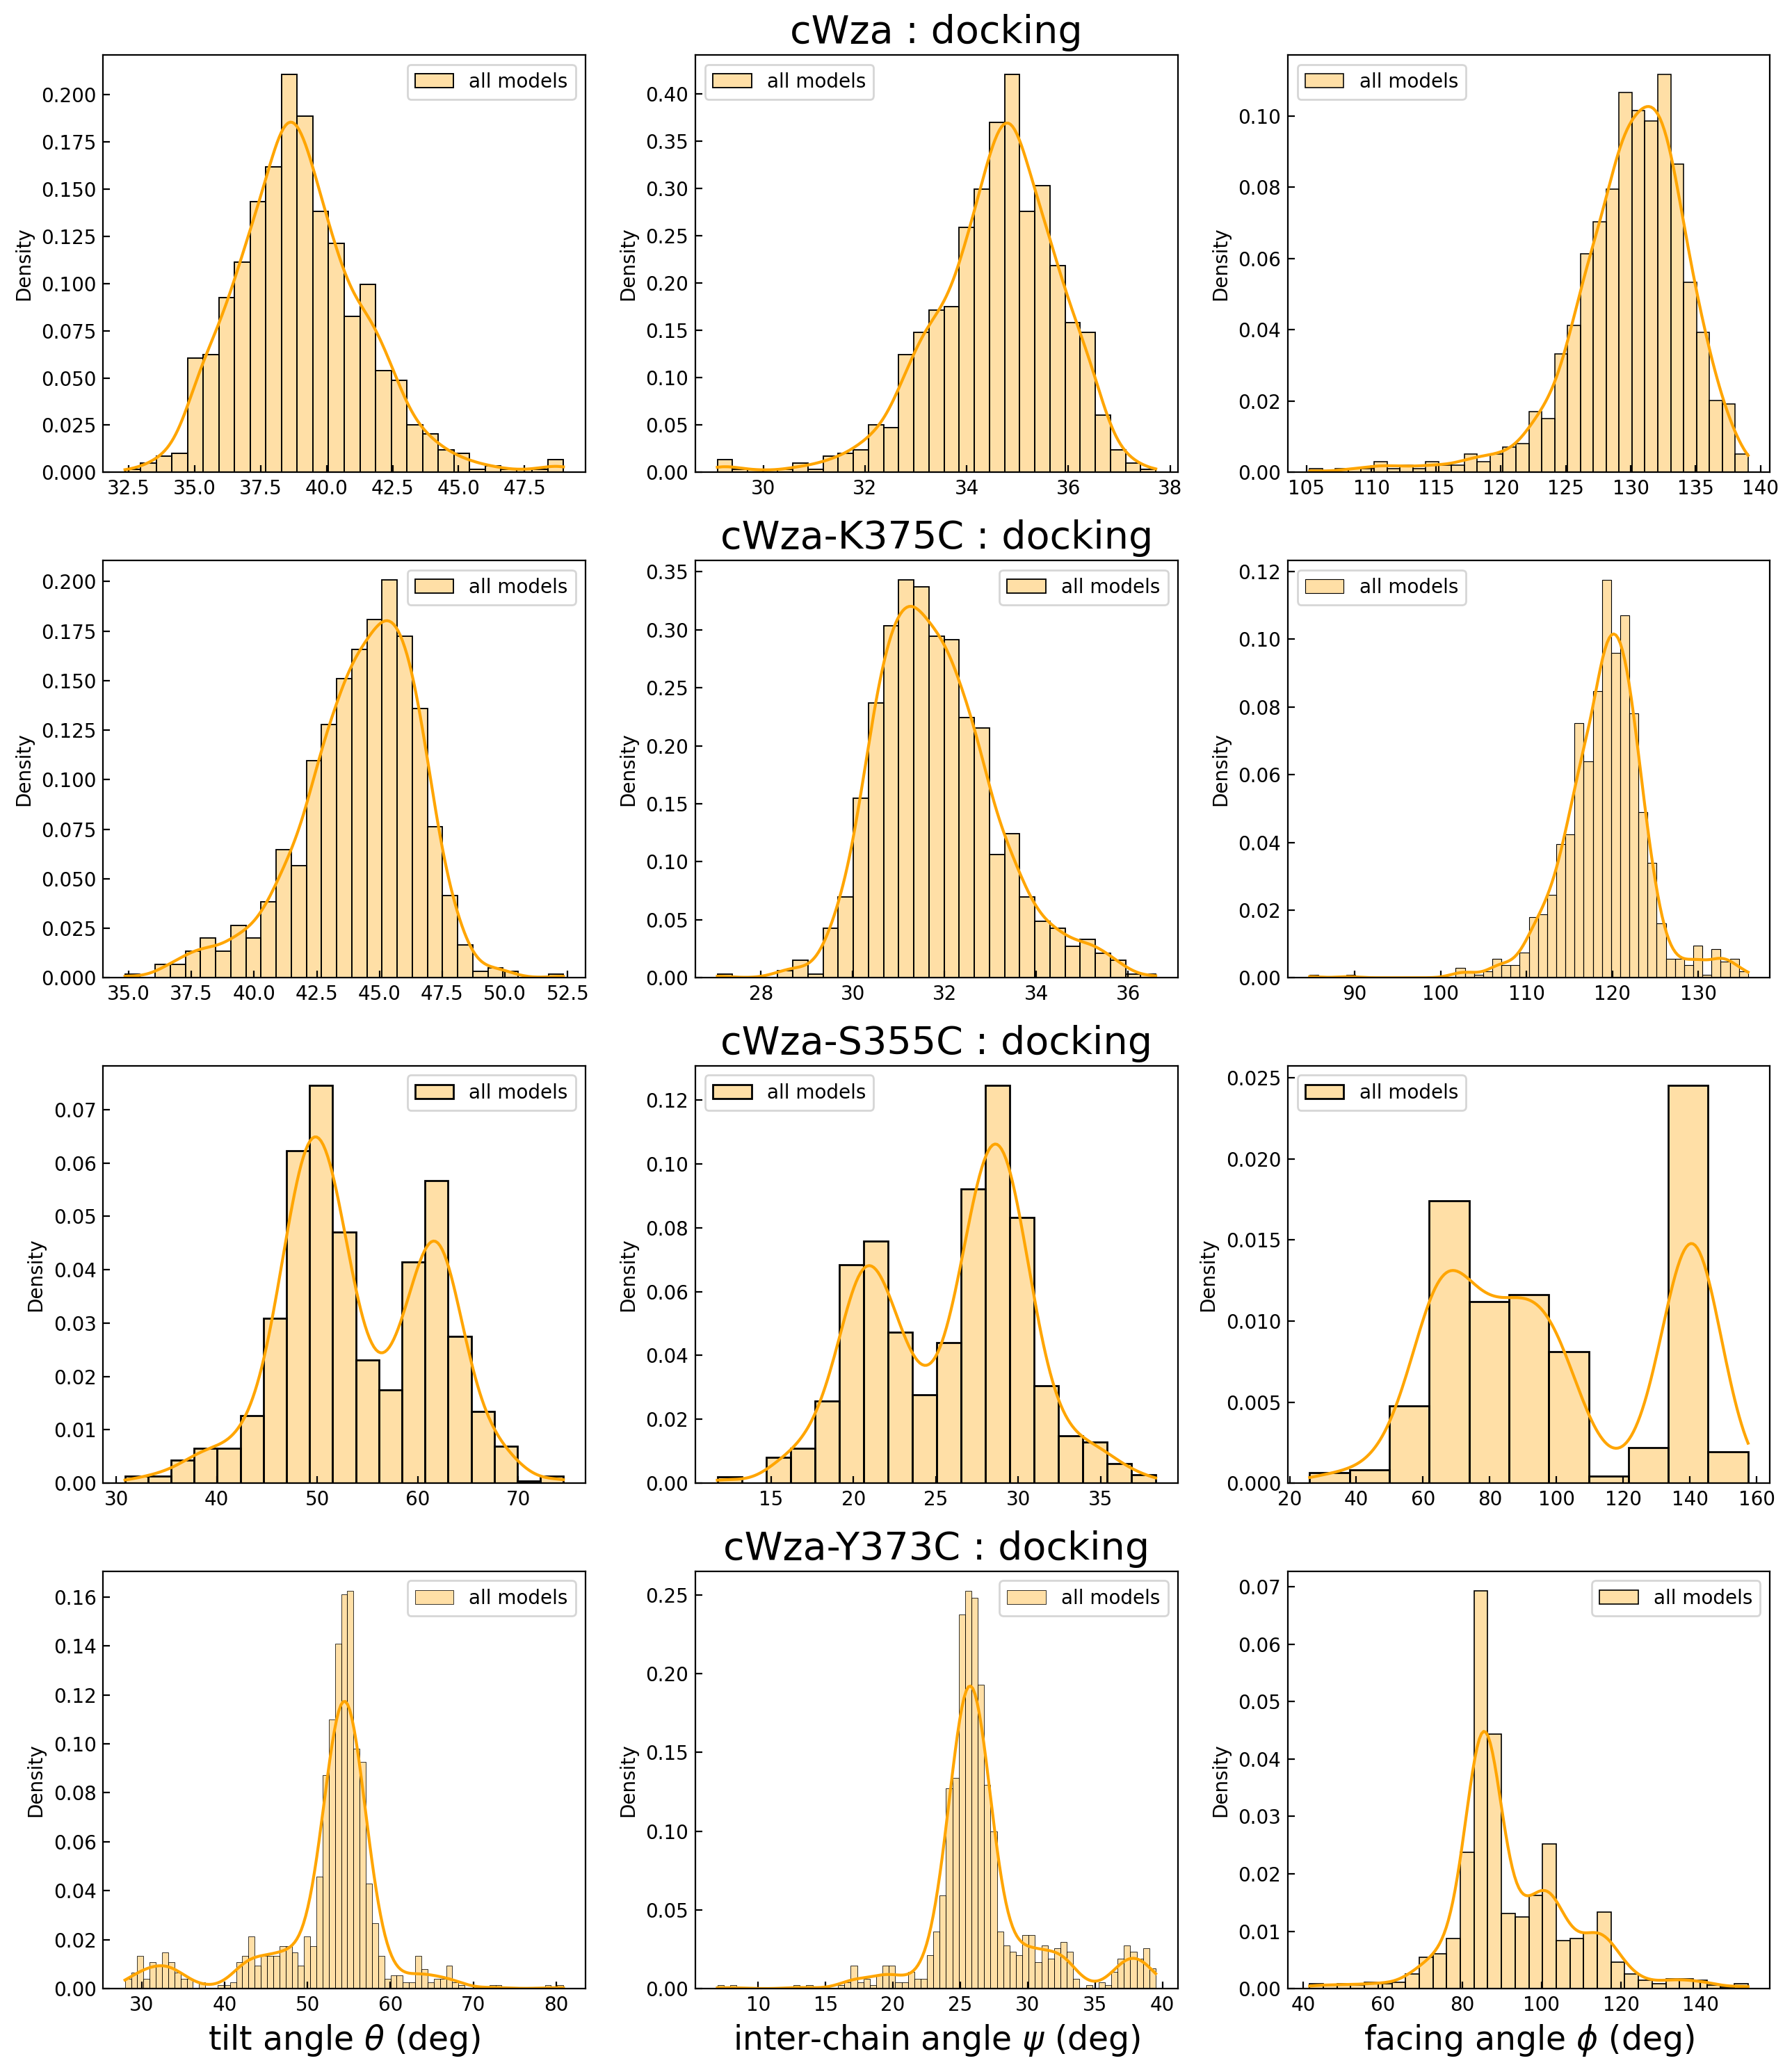

In [4]:
n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),dpi=200)

Colors = {
    'None':'orange'
}

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    group = 'None'
    
    # tilt, interchain, facing angle lists
    Theta = []; Psi = []; Phi = [] 
    
    model_ids = list(S_mutants[mutant].keys())
    for j in range(len(model_ids)):
        
        id = model_ids[j]
        euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
        Theta.append( euler_angles_mean['tilt'] )
        Psi.append( euler_angles_mean['interchain'] )
        Phi.append( euler_angles_mean['facing'] )

    # plot histograms of mean angles
    color, label, alpha = (Colors[group], 'all models', 0.35)
    
    sns.histplot(Theta,color=color,label=label,kde=True,stat='density',alpha=alpha,ax=ax[i,0])
    sns.histplot(Psi,color=color,label=label,kde=True,stat='density',alpha=alpha,ax=ax[i,1])
    sns.histplot(Phi,color=color,label=label,kde=True,stat='density',alpha=alpha,ax=ax[i,2])
    
    # customise title
    title = mutant+' : docking'
    ax[i,1].set_title(title,fontsize=20)
        
f_hist.subplots_adjust(hspace=0.3) # adjust space between subplots

# customise subplots
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)
    for k in range(len(mutant_names)):
        ax[k,i].tick_params(axis='both',direction='in')
        ax[k,i].legend(loc='best')
    
f_hist.tight_layout()
plt.show()

# Distributions of mean peptide Euler angles (classified)

Load labelled IDs data

In [5]:
folder = 'data'
filename_input = "mutants_docking_filtered_ids_labelled.json"
path   = os.path.join(folder, filename_input)

with open(path, 'r') as fp:
    Filtered_IDs = json.load(fp)

Plot average Euler angle values per `mutant` and `conformation`

> _NOTE_ Up-to-date plot version using `seaborn = 0.11.1`. Replaced depricated `distplot` with `histplot`

## Euler angles distributions (adjusted scale)

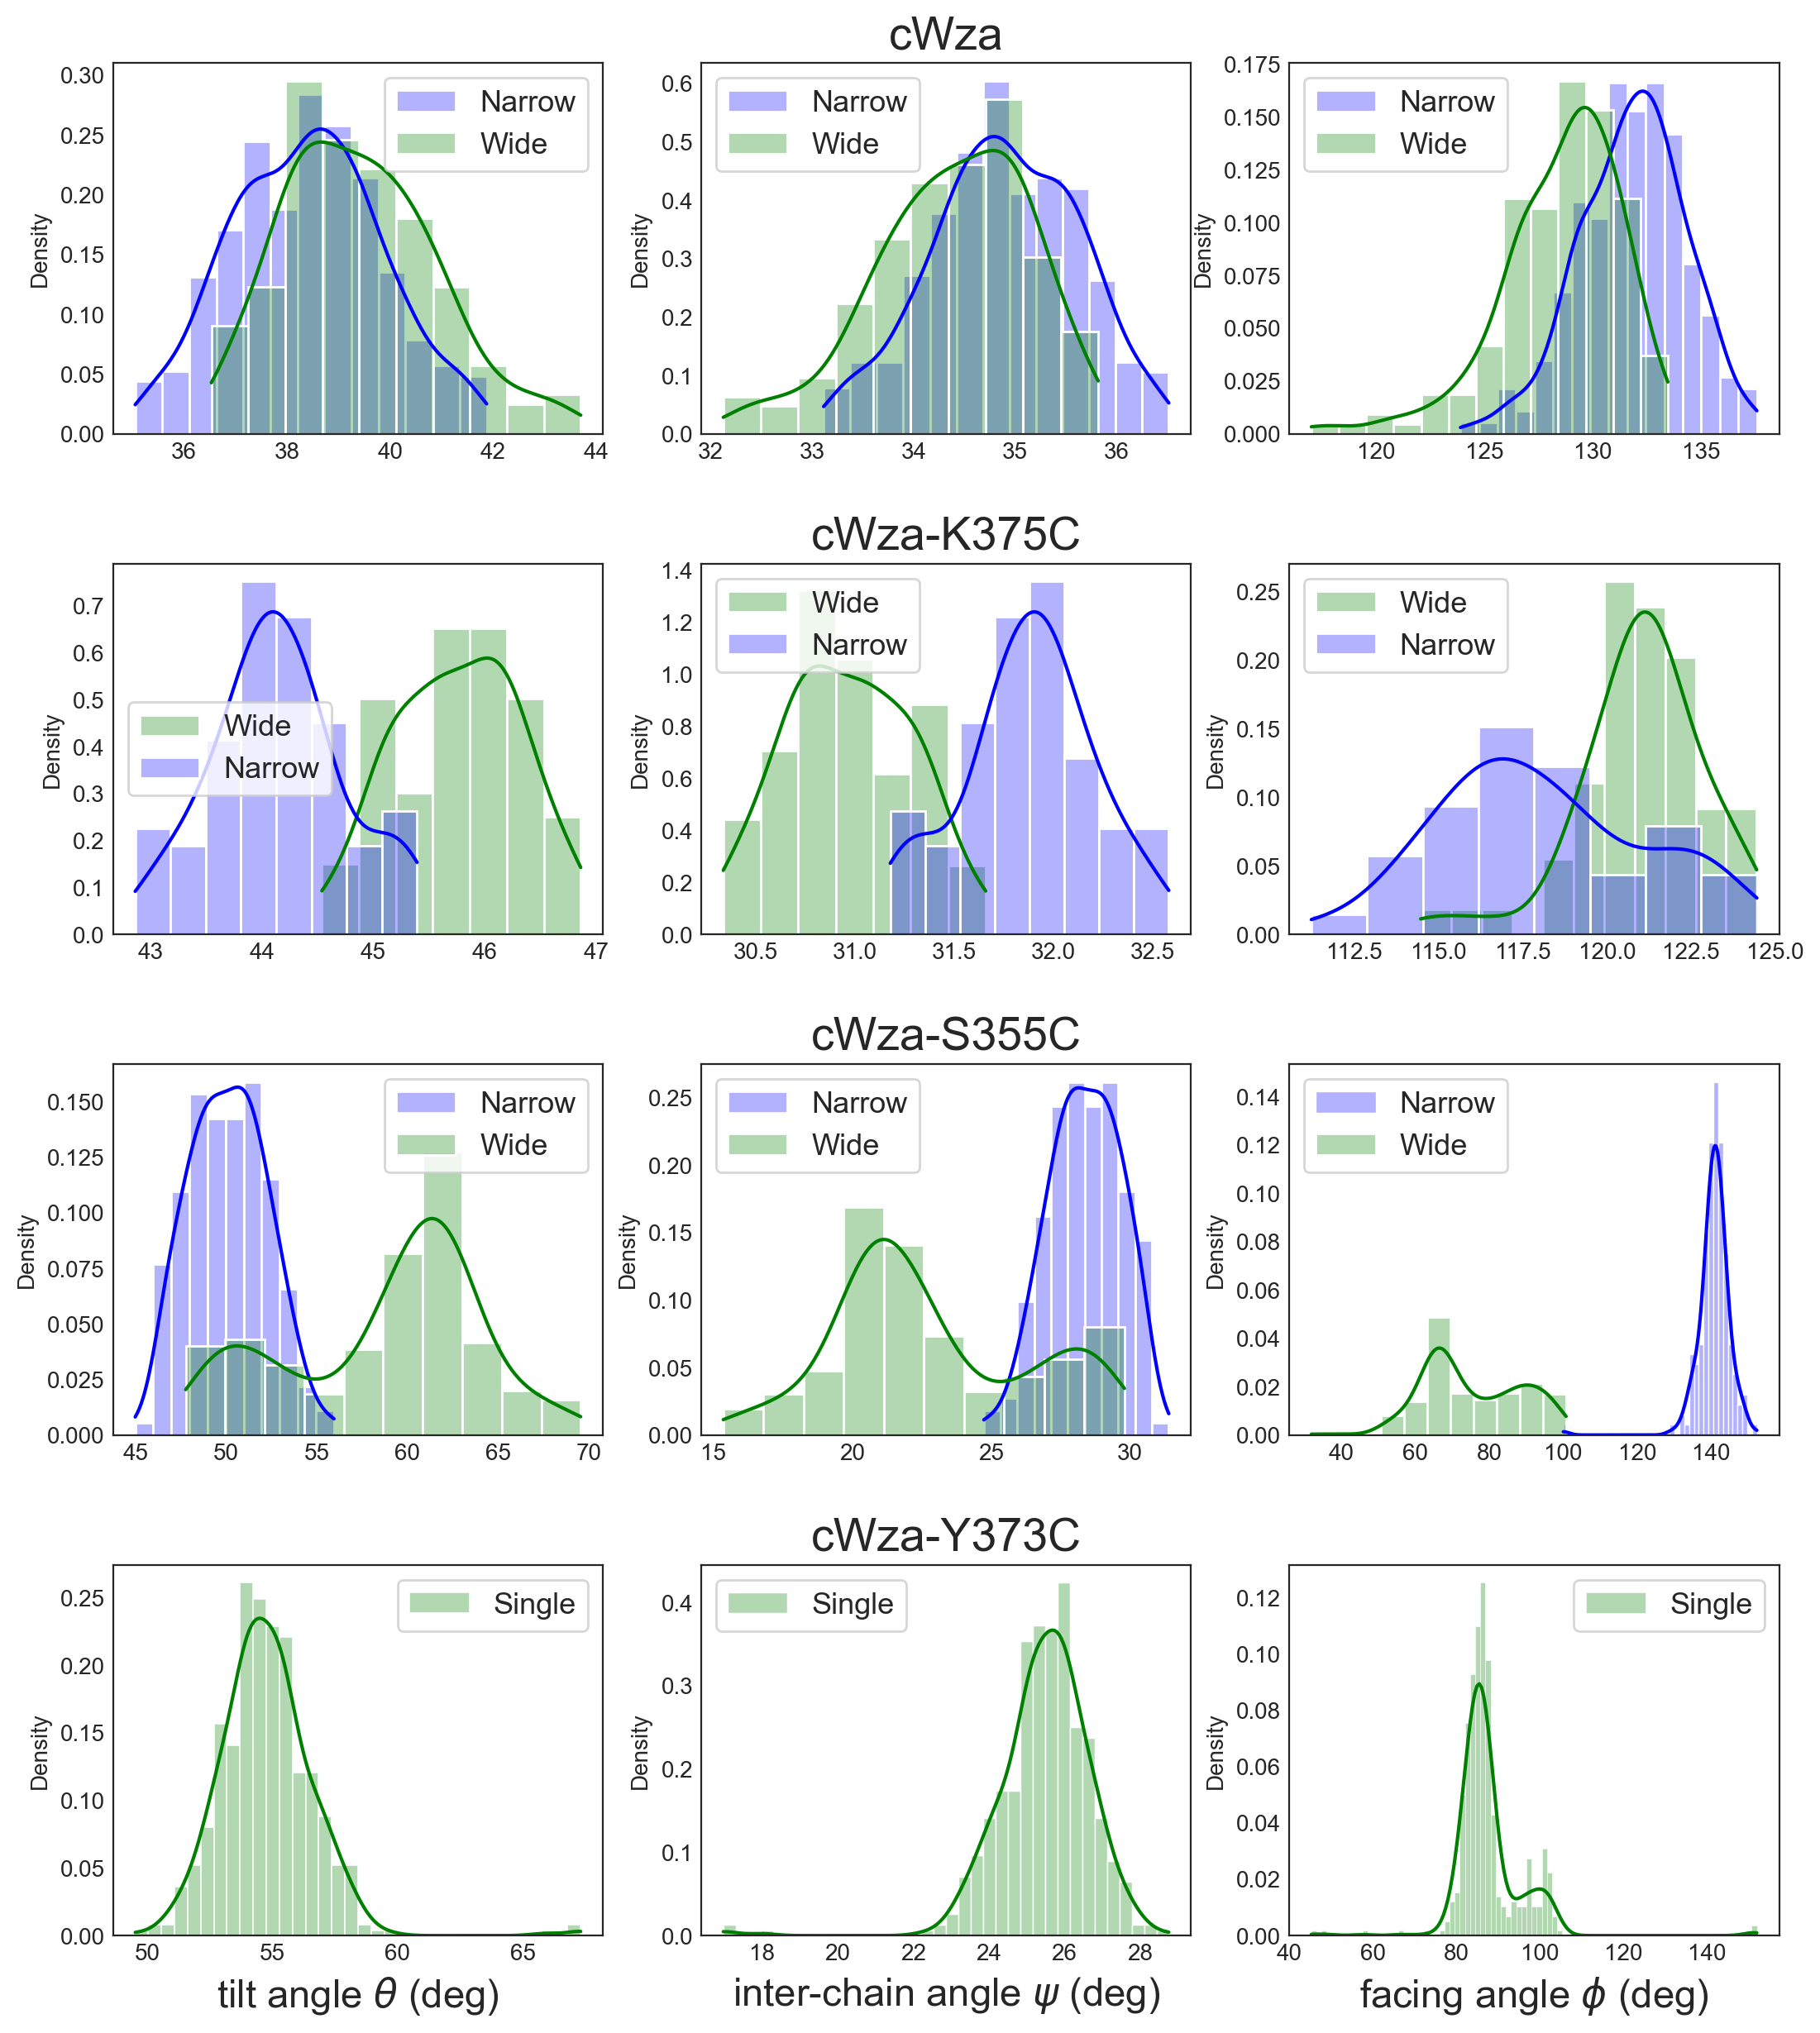

In [6]:
import seaborn as sns
sns.set_style('white')

n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),dpi=200)

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

Colors = {
    'cWza':{'Narrow':'blue', 'Wide':'green'},
    'cWza-K375C':{'Narrow':'green', 'Wide':'blue'},
    'cWza-S355C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-Y373C':{'Single':'green'}
}

Conformations = {
    'cWza':['Narrow', 'Wide'],
    'cWza-K375C':['Narrow', 'Wide'],
    'cWza-S355C':['Narrow', 'Wide'],
    'cWza-Y373C':['Single']
}


for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    n_maxima = len(Filtered_IDs[mutant])
    
    for n in range(n_maxima):
        conformation = Conformations[mutant][n]
        
        # tilt, interchain, facing angle lists
        Theta = []; Psi = []; Phi = []
        
        model_ids = Filtered_IDs[mutant][str(n)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
            Theta.append( euler_angles_mean['tilt'] )
            Psi.append( euler_angles_mean['interchain'] )
            Phi.append( euler_angles_mean['facing'] )
        
        if mutant == 'cWza-K375C' and n == 0:
            mylabel = 'Wide'
        elif mutant == 'cWza-K375C' and n == 1:
            mylabel = 'Narrow'
        else:
            mylabel = conformation
        
        # plot histograms according to conformation
        color = Colors[mutant][conformation]
        alpha = 0.3 # transparency
        sns.histplot(Theta,color=color,kde=True,stat='density',ax=ax[i,0],label=mylabel,alpha=alpha)
        sns.histplot(Psi,color=color,kde=True,stat='density',ax=ax[i,1],label=mylabel,alpha=alpha)
        sns.histplot(Phi,color=color,kde=True,stat='density',ax=ax[i,2],label=mylabel,alpha=alpha)
        
        # customise plot
        ax[i,0].tick_params(axis='both',direction='in')
        ax[i,1].tick_params(axis='both',direction='in')
        ax[i,2].tick_params(axis='both',direction='in')
    
    # customise plot
    ax[i,1].set_title(mutant,fontsize=20)
    ax[i,0].legend(loc='best',fontsize=13)
    ax[i,1].legend(loc='best',fontsize=13)
    ax[i,2].legend(loc='best',fontsize=13)

# customise bottom labels
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)

f_hist.subplots_adjust(hspace=0.35)
# plt.tight_layout()
plt.show()

<span style="color:red">MODIFIED VERSION</span>

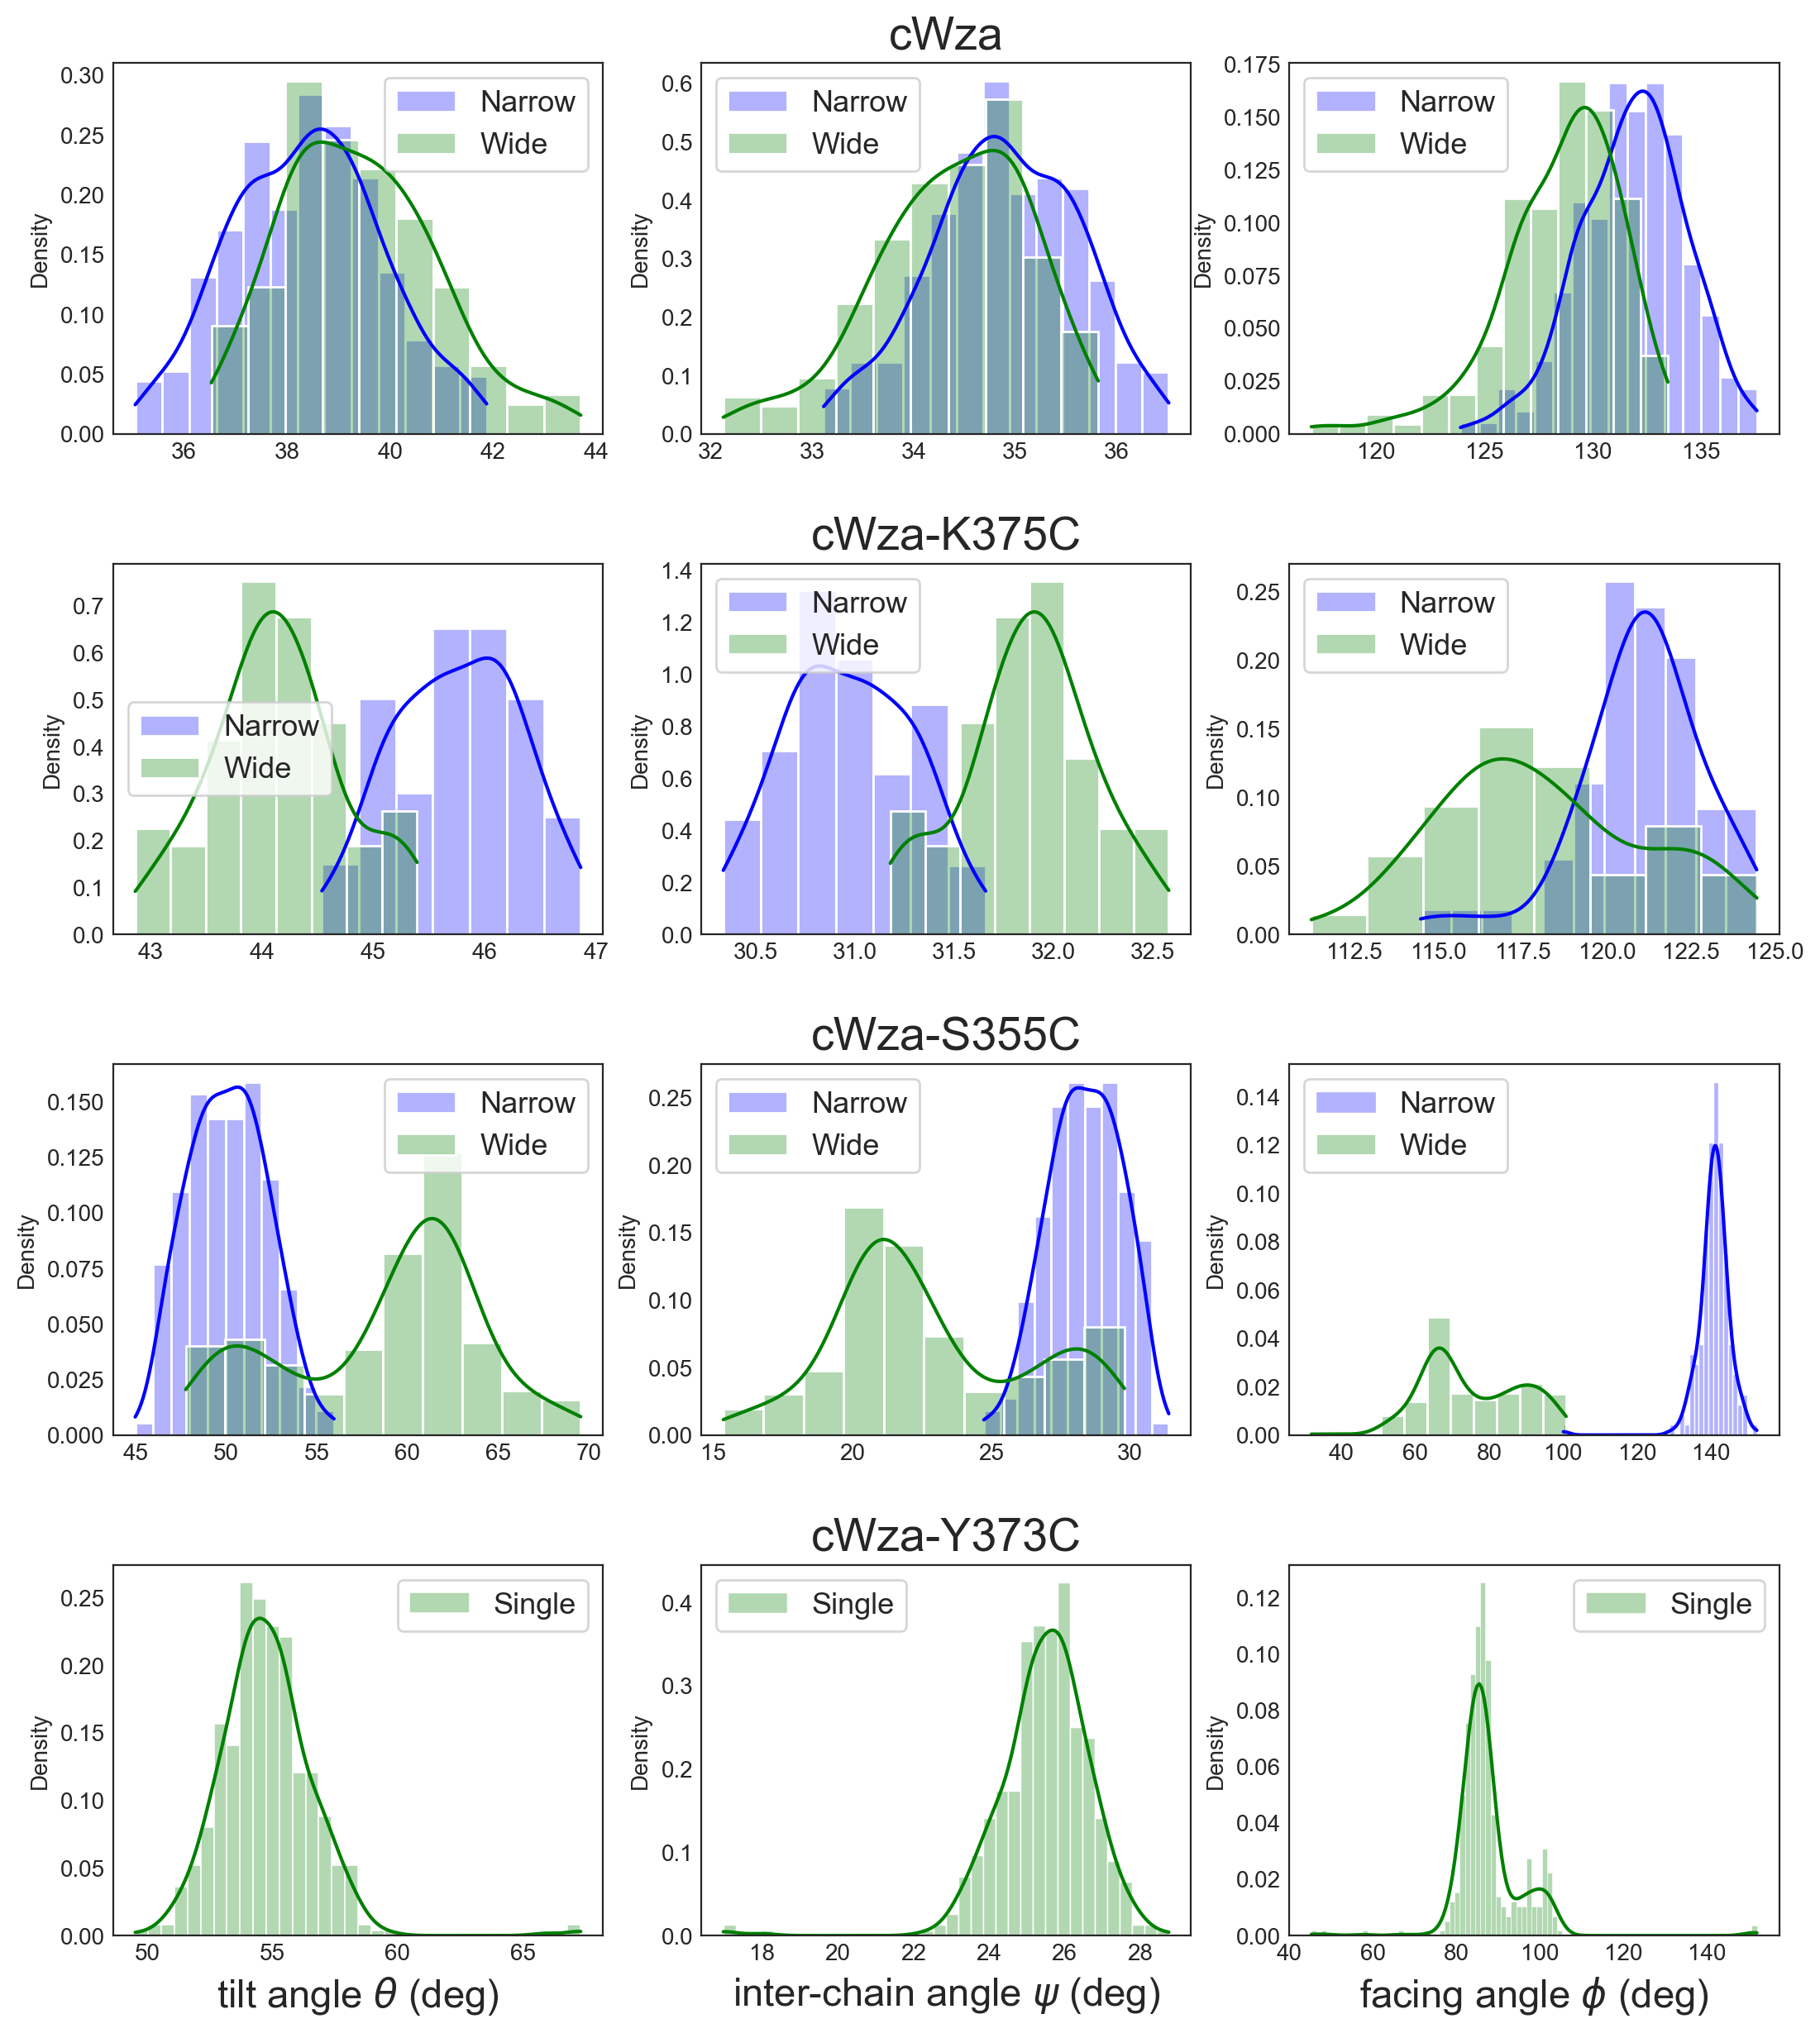

In [7]:
import seaborn as sns
sns.set_style('white')

n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),dpi=200)

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

Colors = {
    'cWza':{'Narrow':'blue', 'Wide':'green'},
    'cWza-K375C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-S355C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-Y373C':{'Single':'green'}
}

Conformations = {
    'cWza':['Narrow', 'Wide'],
    'cWza-K375C':['Narrow', 'Wide'],
    'cWza-S355C':['Narrow', 'Wide'],
    'cWza-Y373C':['Single']
}


for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    n_maxima = len(Filtered_IDs[mutant])
    
    for n in range(n_maxima):
        conformation = Conformations[mutant][n]
        
        # tilt, interchain, facing angle lists
        Theta = []; Psi = []; Phi = []
        
        model_ids = Filtered_IDs[mutant][str(n)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
            Theta.append( euler_angles_mean['tilt'] )
            Psi.append( euler_angles_mean['interchain'] )
            Phi.append( euler_angles_mean['facing'] )
        
        # plot histograms according to conformation
        color = Colors[mutant][conformation]
        mylabel = conformation
        alpha = 0.3 # transparency
        sns.histplot(Theta,color=color,kde=True,stat='density',ax=ax[i,0],label=mylabel,alpha=alpha)
        sns.histplot(Psi,color=color,kde=True,stat='density',ax=ax[i,1],label=mylabel,alpha=alpha)
        sns.histplot(Phi,color=color,kde=True,stat='density',ax=ax[i,2],label=mylabel,alpha=alpha)
        
        # customise plot
        ax[i,0].tick_params(axis='both',direction='in')
        ax[i,1].tick_params(axis='both',direction='in')
        ax[i,2].tick_params(axis='both',direction='in')
    
    # customise plot
    ax[i,1].set_title(mutant,fontsize=20)
    ax[i,0].legend(loc='best',fontsize=13)
    ax[i,1].legend(loc='best',fontsize=13)
    ax[i,2].legend(loc='best',fontsize=13)

# customise bottom labels
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)

f_hist.subplots_adjust(hspace=0.35)
# plt.tight_layout()
plt.show()

## Euler angles distributions (same scale)

ORIGINAL VERSION

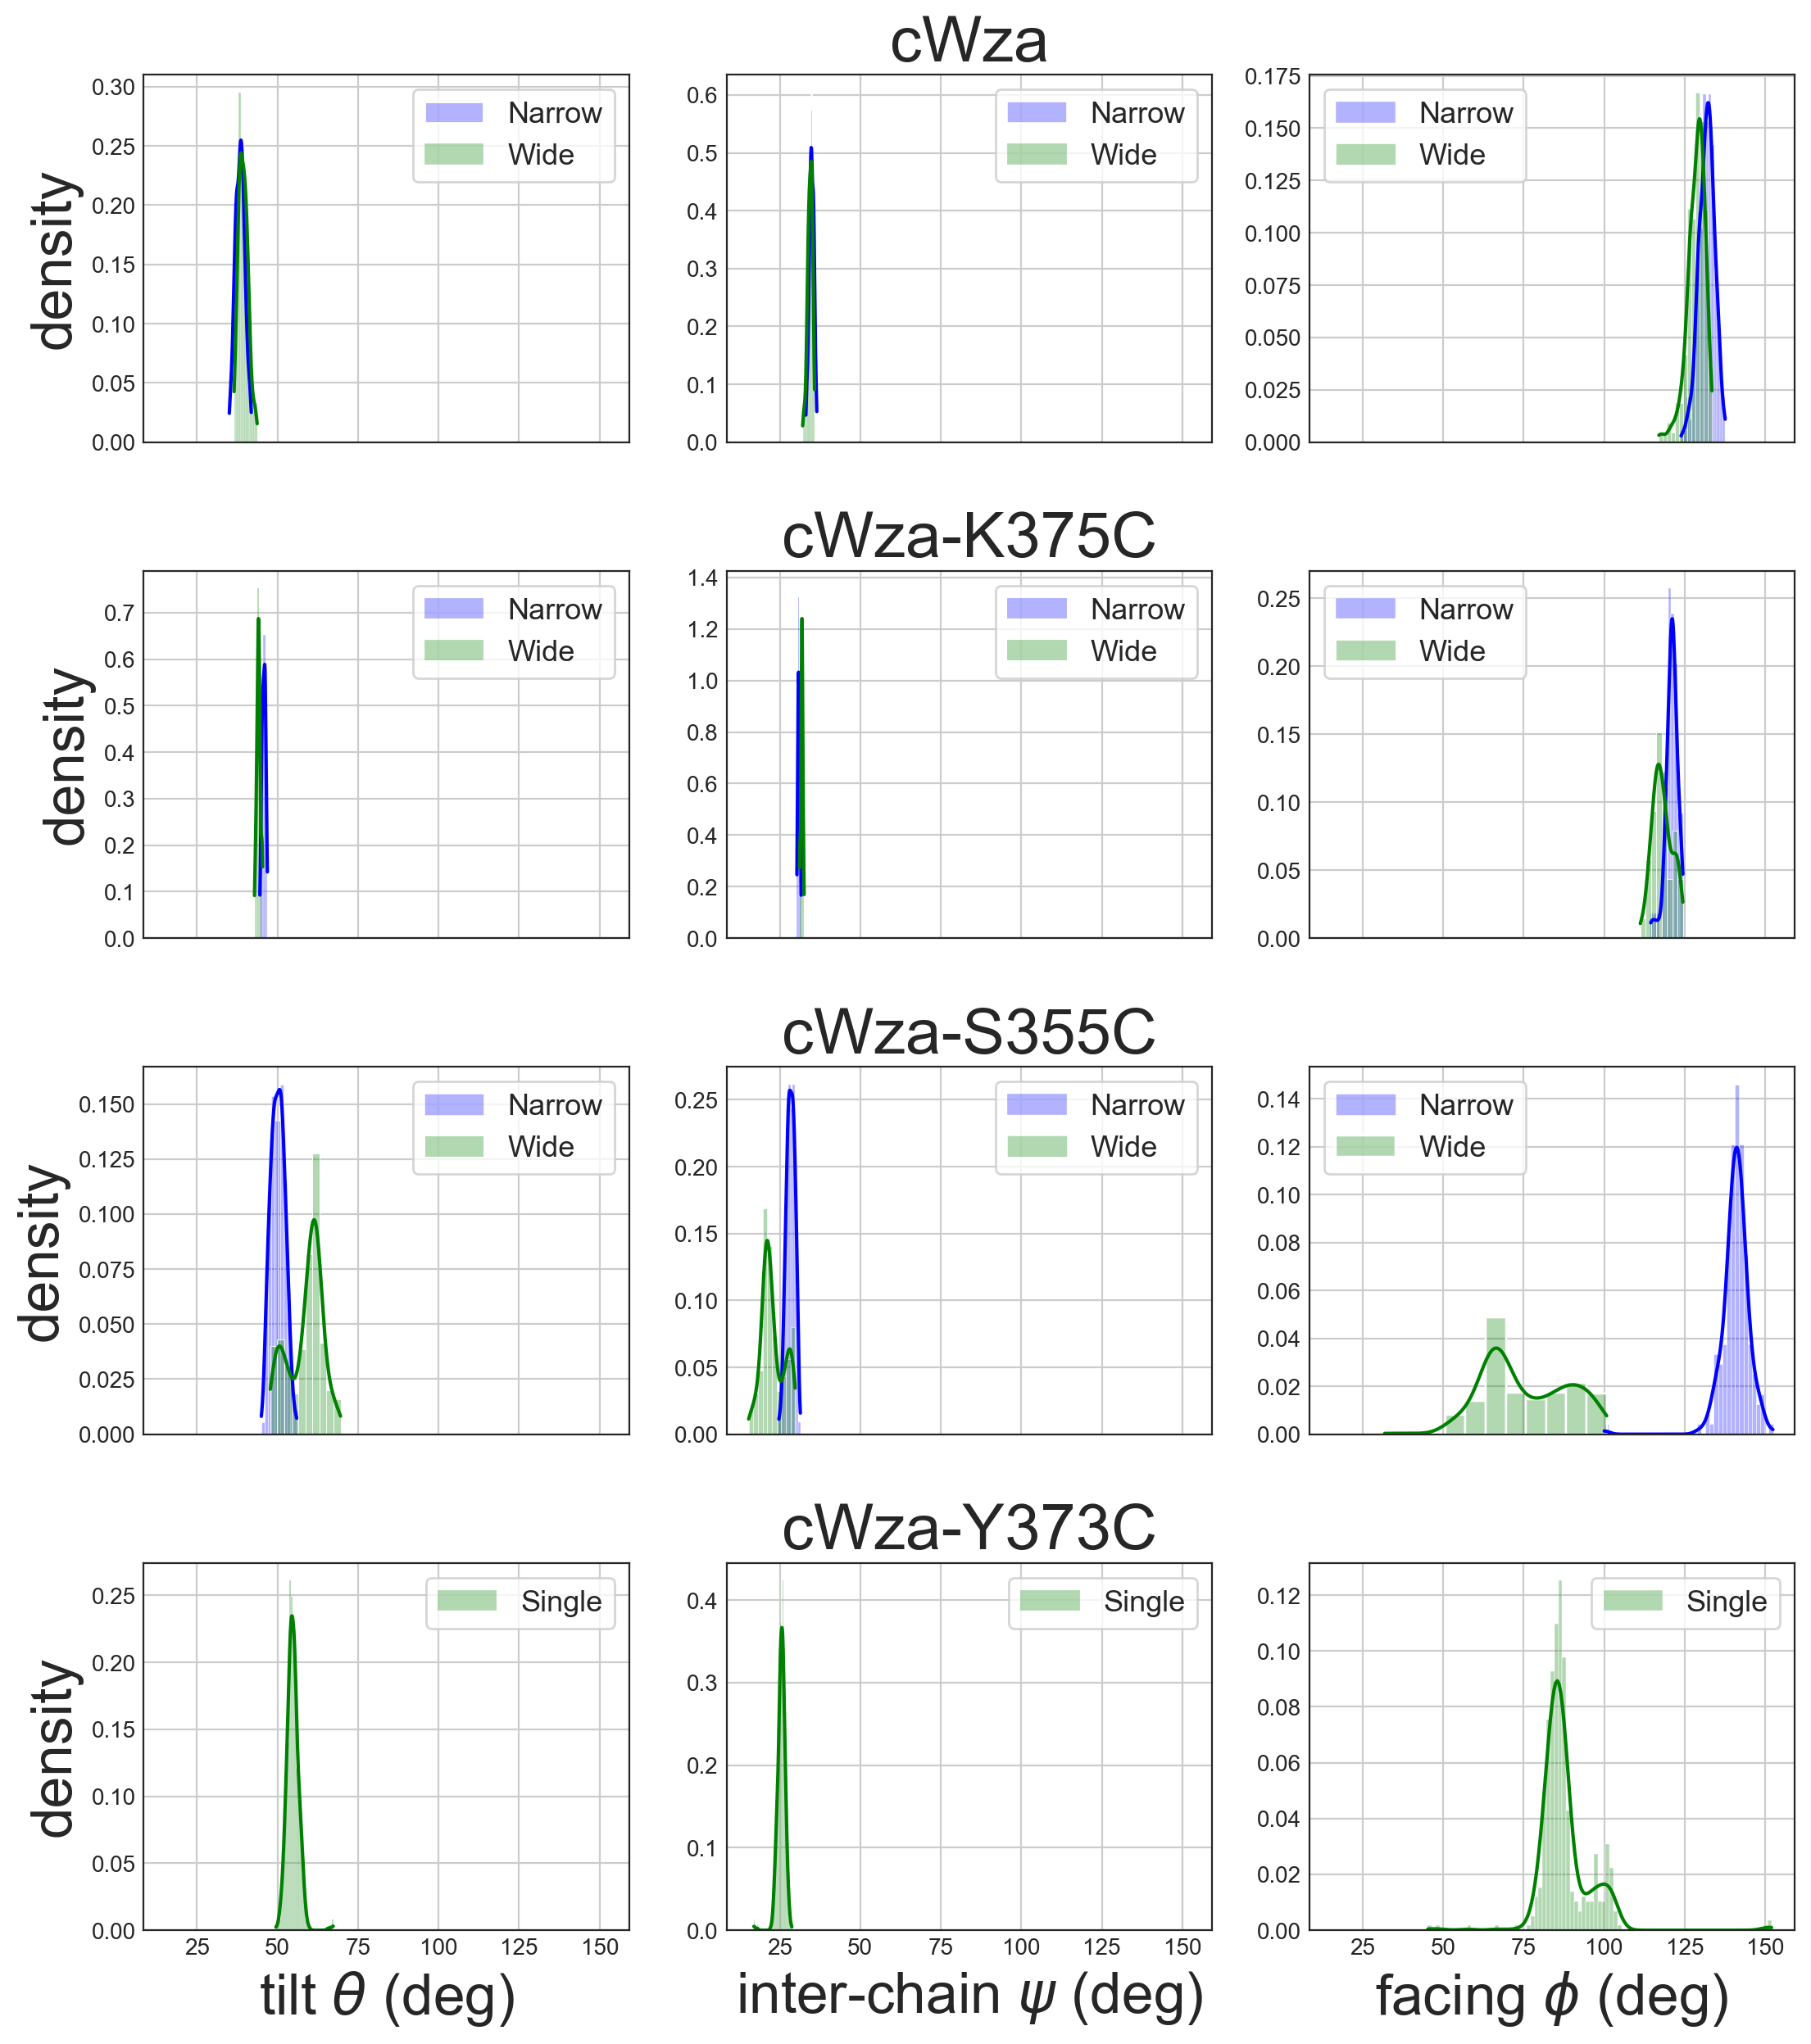

In [16]:
import seaborn as sns
sns.set_style('white')

n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),sharex=True,dpi=200)

xlabels = [
    "tilt $\\theta$ (deg)",
    "inter-chain $\\psi$ (deg)",
    "facing $\\phi$ (deg)"
]

Colors = {
    'cWza':{'Narrow':'blue', 'Wide':'green'},
    'cWza-K375C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-S355C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-Y373C':{'Single':'green'}
}

Conformations = {
    'cWza':['Narrow', 'Wide'],
    'cWza-K375C':['Narrow', 'Wide'],
    'cWza-S355C':['Narrow', 'Wide'],
    'cWza-Y373C':['Single']
}


for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    n_maxima = len(Filtered_IDs[mutant])
    
    for n in range(n_maxima):
        conformation = Conformations[mutant][n]
        
        # tilt, interchain, facing angle lists
        Theta = []; Psi = []; Phi = []
        
        model_ids = Filtered_IDs[mutant][str(n)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
            Theta.append( euler_angles_mean['tilt'] )
            Psi.append( euler_angles_mean['interchain'] )
            Phi.append( euler_angles_mean['facing'] )
        
        # plot histograms according to conformation
        color = Colors[mutant][conformation]
        mylabel = conformation
        alpha = 0.3 # transparency
        sns.histplot(Theta,color=color,kde=True,stat='density',ax=ax[i,0],label=mylabel,alpha=alpha)
        sns.histplot(Psi,color=color,kde=True,stat='density',ax=ax[i,1],label=mylabel,alpha=alpha)
        sns.histplot(Phi,color=color,kde=True,stat='density',ax=ax[i,2],label=mylabel,alpha=alpha)
        
        # customise plot
        ax[i,0].tick_params(axis='both',direction='in')
        ax[i,1].tick_params(axis='both',direction='in')
        ax[i,2].tick_params(axis='both',direction='in')
        
        ax[i,0].grid(True)
        ax[i,1].grid(True)
        ax[i,2].grid(True)
    
    # customise plot
    ax[i,1].set_title(mutant,fontsize=28)
    ax[i,0].legend(loc='best',fontsize=13)
    ax[i,1].legend(loc='best',fontsize=13)
    ax[i,2].legend(loc='best',fontsize=13)
    ax[i,0].set_ylabel("density",fontsize=25)
    ax[i,1].set_ylabel("",fontsize=25)
    ax[i,2].set_ylabel("",fontsize=25)

# customise bottom labels
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=25)

f_hist.subplots_adjust(hspace=0.35)
plt.grid(True)
# plt.tight_layout()
plt.show()

NEW VERSION

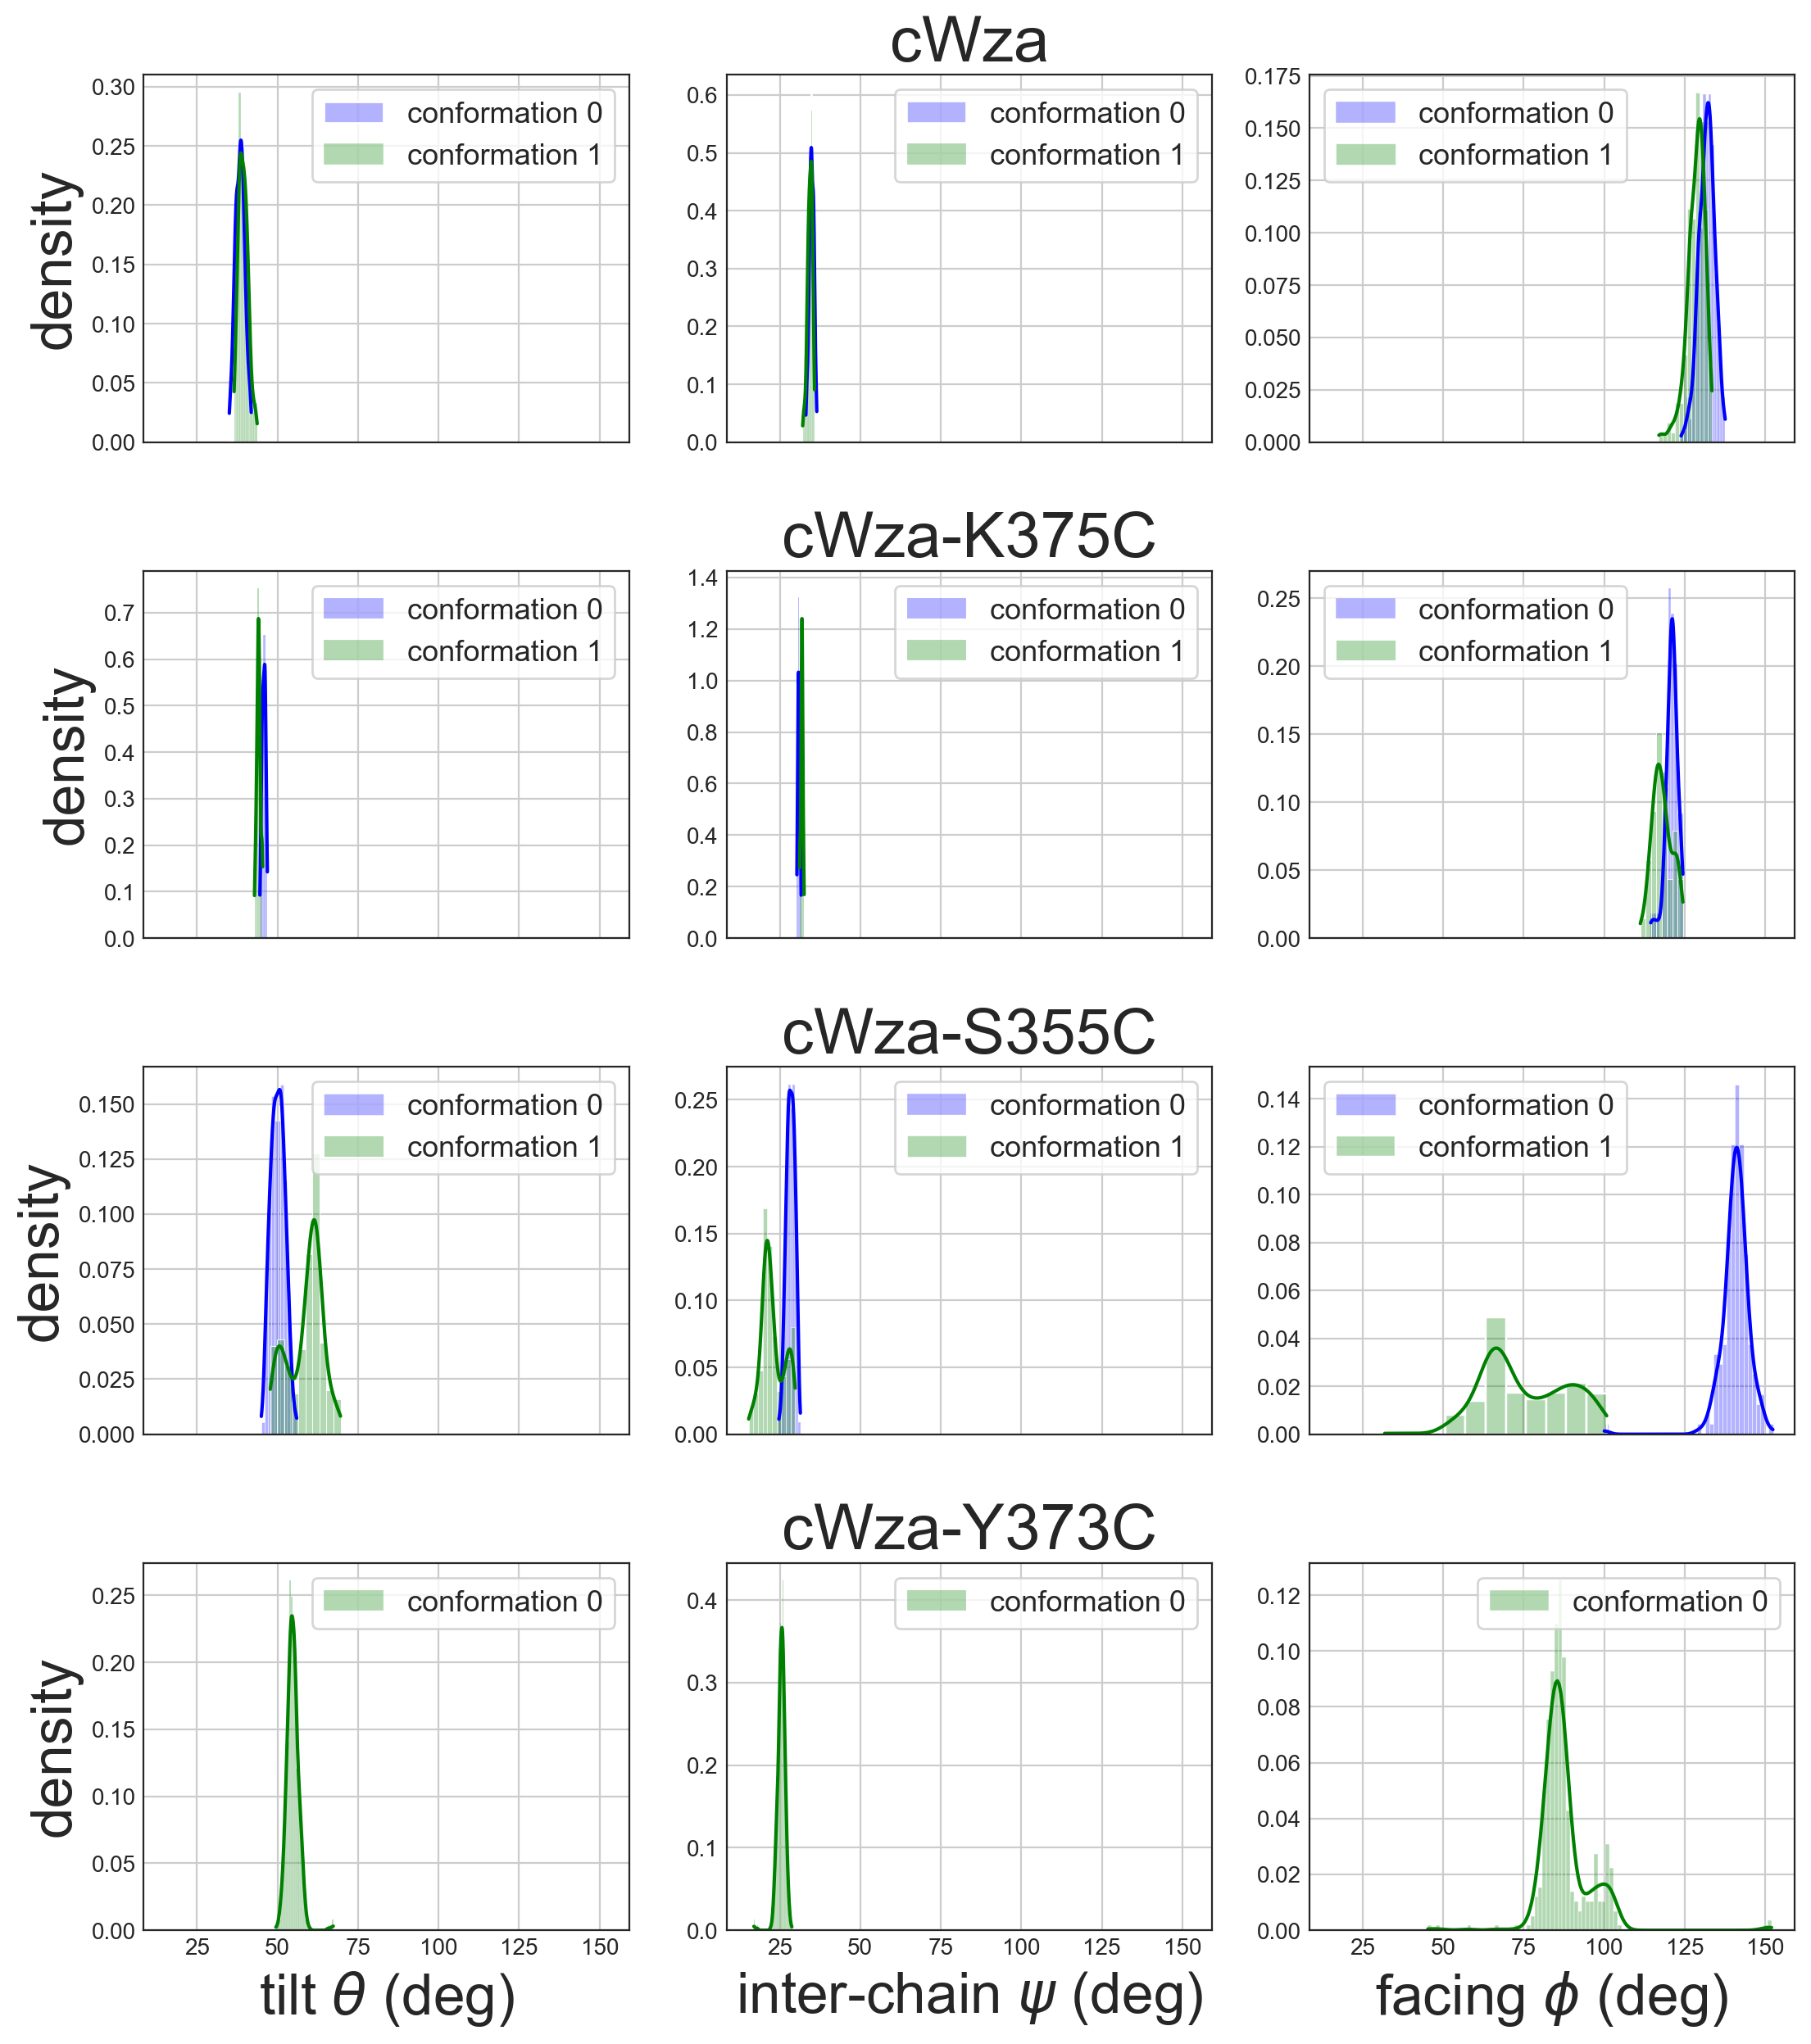

In [17]:
import seaborn as sns
sns.set_style('white')

n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),sharex=True,dpi=200)

xlabels = [
    "tilt $\\theta$ (deg)",
    "inter-chain $\\psi$ (deg)",
    "facing $\\phi$ (deg)"
]

Colors = {
    'cWza':{'Narrow':'blue', 'Wide':'green'},
    'cWza-K375C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-S355C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-Y373C':{'Single':'green'}
}

Conformations = {
    'cWza':['Narrow', 'Wide'],
    'cWza-K375C':['Narrow', 'Wide'],
    'cWza-S355C':['Narrow', 'Wide'],
    'cWza-Y373C':['Single']
}


for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    n_maxima = len(Filtered_IDs[mutant])
    
    for n in range(n_maxima):
        conformation = Conformations[mutant][n]
        
        # tilt, interchain, facing angle lists
        Theta = []; Psi = []; Phi = []
        
        model_ids = Filtered_IDs[mutant][str(n)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
            Theta.append( euler_angles_mean['tilt'] )
            Psi.append( euler_angles_mean['interchain'] )
            Phi.append( euler_angles_mean['facing'] )
        
        # plot histograms according to conformation
        color = Colors[mutant][conformation]
#         mylabel = conformation
        mylabel = "conformation "+str(n)
        alpha = 0.3 # transparency
        sns.histplot(Theta,color=color,kde=True,stat='density',ax=ax[i,0],label=mylabel,alpha=alpha)
        sns.histplot(Psi,color=color,kde=True,stat='density',ax=ax[i,1],label=mylabel,alpha=alpha)
        sns.histplot(Phi,color=color,kde=True,stat='density',ax=ax[i,2],label=mylabel,alpha=alpha)
        
        # customise plot
        ax[i,0].tick_params(axis='both',direction='in')
        ax[i,1].tick_params(axis='both',direction='in')
        ax[i,2].tick_params(axis='both',direction='in')
        
        ax[i,0].grid(True)
        ax[i,1].grid(True)
        ax[i,2].grid(True)
    
    # customise plot
    ax[i,1].set_title(mutant,fontsize=28)
    ax[i,0].legend(loc='best',fontsize=13)
    ax[i,1].legend(loc='best',fontsize=13)
    ax[i,2].legend(loc='best',fontsize=13)
    ax[i,0].set_ylabel("density",fontsize=25)
    ax[i,1].set_ylabel("",fontsize=25)
    ax[i,2].set_ylabel("",fontsize=25)

# customise bottom labels
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=25)

f_hist.subplots_adjust(hspace=0.35)
plt.grid(True)
# plt.tight_layout()
plt.show()

# <span style="color:red">TO-DO's</span>

* Finish editing of modified version 
* Add cells to generate publication figure